#Introduction 

"*Bayesian inference is a method of statistical inference in which Bayes' theorem is used to update the probability for a hypothesis as more evidence or information becomes available.*" [Wikipedia](https://en.wikipedia.org/wiki/Bayesian_inference)

References :

*   [Bayesian Modeling and Computation in Python](https://bayesiancomputationbook.com/welcome.html)

## A brieve introduction to 🅱️ayesian philosophy

In a Bayesian inference problem, we gather all the a priori  knowledge we have about the problem by defining probability distributions for our parameters $\theta$, the so-called **prior distribution**. We then need to build a statistical model, which will allow us to estimate how likely a set of parameters would be, conditioned on a given observation $X$, the so-called **likelihood** of the problem. From this, by confronting our a priori knowledge with the observations we make of the system, we can determine the probability of a parameter set given the data we have. 

The whole process of Bayesian inference can thus be seen as the updating of our a priori knowledge via the additional information provided by the observations of the system, driving additional constraints (when the observations are relevant). 

diagram-20220426 (1).svg

## Some maths (very little)

The main goal of a Bayesian inference problem is to compute the posterior distribution of a given parameter $\theta$, conditioned on an observation $X$, i.e. the probability $P(\theta \vert X)$. To do so, we rely on the Bayes formula : 

$$ P(\theta \vert X) = \frac{P(X \vert \theta)P(\theta)}{P(X)} $$


*   $P(X)$ is called the evidence, this quantity is of little use as it remains constant for a given problem and simply consist in a normalization factor that exists to ensure the integrability of $P(\theta \vert X)$
*   $P(\theta)$ is the prior distribution of our parameters 
*   $P(X \vert \theta)$ is the likelihood of our problem, which translate how likely is an observation given a set of parameters 

Evaluating the posterior distribution can seem easy at first sight, but it is not, as those probabilities hide high dimension integrals. But as we have almost neat computational power in 2022 (1 iPhone X $\sim$ 100,000 times the processing power of the computer that landed man), we developed solutions to compute approximations for the posterior distribution. 

## Fantastic Samplers ...

A **sampler** is a Markov-Chain/Monte-Carlo (MCMC) method to estimate the posterior distribution of a given problem. It launches Markov-Chains that will wander in the parameter space, and after a given time, the samples in the chain will be distributed according to the posterior distribution. There is a huge number of samplers used in the state of the art. Most of them rely on {proposal + random acceptance} of new states, some of them require computing the gradient of the likelihood as a function of parameters. You can find a [nice illustration](https://chi-feng.github.io/mcmc-demo/app.html?algorithm=RandomWalkMH&target=banana) of various sampling algorithm, to get a visual idea of how they work. 

In theory, the posterior distribution is independent of the sampler used to approximate it. However, some performs better with fancy posterior, some are slower, some are faster. A good sampler ensures that the final samples are lowly correlated, and it converges fast to the stationary distribution.  

A brief list of the most used ones : 

*    [Metropolis-Hastings](https://en.wikipedia.org/wiki/Metropolis%E2%80%93Hastings_algorithm) is the most basic sampling algorithm you can imagine. At each step, it proposes a new state for the chain. If the new state improves the likelihood, then it is accepted. Otherwise, it is rejected or accepted with a probability function of the likelihood difference between the two states. This enables the chain to possibly spend time in every possible location of the parameter space, while spending most of his time around the maxima of likelihood. 
*   [Hamiltonian Monte Carlo](https://en.wikipedia.org/wiki/Hamiltonian_Monte_Carlo) (HMC) is a sampling algorithm where the new states are proposed using Hamiltonian dynamic propagation. The new possible states are often "far away" to the previous step (when compared to Metropolis-Hastings) which reduce the correlation between successive states while keeping a good acceptance rate because of the energy conserving propagation.  
*   [No U-Turn Sampler](https://en.wikipedia.org/wiki/Hamiltonian_Monte_Carlo#No_U-Turn_Sampler) (NUTS) is an improvement of HMC, which includes an adaptive step which is correlated to the curvature of the posterior distribution around the state of the chain. It also contains several fancy features such as a doubling scheme until the achievement of a U-turn to ensure quality in the next states. 
* [Nested Sampling Algoritm](https://en.wikipedia.org/wiki/Nested_sampling_algorithm) proposes a MCMC-free approach, relying on evolutionary strategies where the posterior distribution will be learned through redistribution of successive generations of parameters

**Never code your sampler by yourself : it already exists and yours will be BAD.**

## and where to find them !

There are a LOT of packages proposing Bayesian computing in Python. I will list some of them here :
 
*   [emcee](https://emcee.readthedocs.io/en/stable/) is probably the lightest weight and the most used library for MCMC sampling. However, you have to define the prior and likelihood by yourself, which can be pretty tedious. It relies on a Metropolis-like algorithm to perform the posterior computation
*   [ultranest](https://johannesbuchner.github.io/UltraNest/index.html) is the reference for Pythonic nested sampling. Still a bit tedious as you have to define the prior as transformations of a N-dimensional unitary uniform random variable 
*   [PyMC](https://docs.pymc.io/en/v3/) which is my favorite, as it is both user-friendly and very sophisticated regarding the features it proposes, and implements NUTS-sampler without having to explicitly knowing the gradient of your likelihood thanks to autodifferentiation libraries (theanos for v3 and aesara for v4). **This is the library you should try first**.
*  [pyro](https://docs.pyro.ai/en/stable/) which strongly embeds machine learning through pytorch, and implements low-level variational inference methods.
*  [numpyro](https://num.pyro.ai/en/stable/) which is the one I am using for my thesis, proposes super fast computation and autodifferentiation with JAX

In [ ]:
!pip install pymc jax jaxlib numpyro

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 543 kB 4.8 MB/s 
     |████████████████████████████████| 291 kB 61.3 MB/s 
     |████████████████████████████████| 1.4 MB 57.4 MB/s 
     |████████████████████████████████| 49 kB 5.4 MB/s 
     |████████████████████████████████| 41 kB 275 kB/s 
  Created wheel for cons: filename=cons-0.4.5-py3-none-any.whl size=9118 sha256=b8917aed74bbc101625d29b42a6c1eb94d594f5a234b91bd7bff77477b6d1965
  Stored in directory: /root/.cache/pip/wheels/82/c9/59/093d33254965d43748af10c13bb61e38599a88ce0885030d10
  Created wheel for logical-unification: filename=logical_unification-0.4.5-py3-none-any.whl size=13772 sha256=eb7f9971de8716b50be5ae9b8c56415f27a6c79705d1e30e1345eca135d334ca
  Stored in directory: /root/.cache/pip/wheels/e7/f3/fc/78701993d9639bd2a14f83c0170bbf1e6d207b9a72fbf054f4
  Created wheel for etuples: filename=etuples-0.3.5-py3-none-any.whl size=12414 s

In [ ]:
# No idea why, but Colab needs this
%env MKL_THREADING_LAYER=GNU

env: MKL_THREADING_LAYER=GNU


# Ultra simplistic & detailed curve fitting

In [ ]:
import numpy as np
import pymc as pm
import matplotlib.pyplot as plt
import arviz as az

%matplotlib inline

## Create some fake data

In [ ]:
def generate_fake_data(x, a, b, sigma):
  return a*x + b + np.random.normal(scale=sigma, size=x.shape)

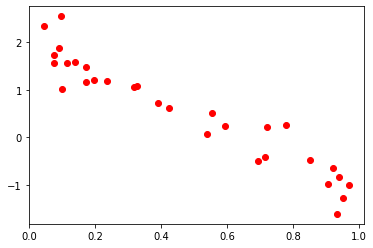

In [ ]:
a_ref, b_ref, sigma_ref =  -3, 2, 0.3

x_observed = np.random.uniform(0, 1, 30)
y_observed = generate_fake_data(x_observed, a_ref, b_ref, sigma_ref)

plt.scatter(x_observed, y_observed, color='red');

## Setting up the model 

In [ ]:
with pm.Model() as model :

  a = pm.Flat('a')
  b = pm.Flat('b')
  sigma = pm.HalfFlat('sigma')

  y = pm.Normal('likelihood', mu = a*x_observed + b, sigma=sigma, observed=y_observed) 

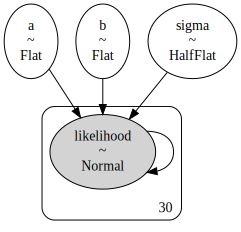

In [ ]:
pm.model_graph.model_to_graphviz(model=model)

##Sampling and results


In [ ]:
#Launch posterior sampling with NUTS 
with model as model:
  inference_data = pm.sample(chains=4, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (4 chains in 1 job)
NUTS: [a, b, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 12 seconds.


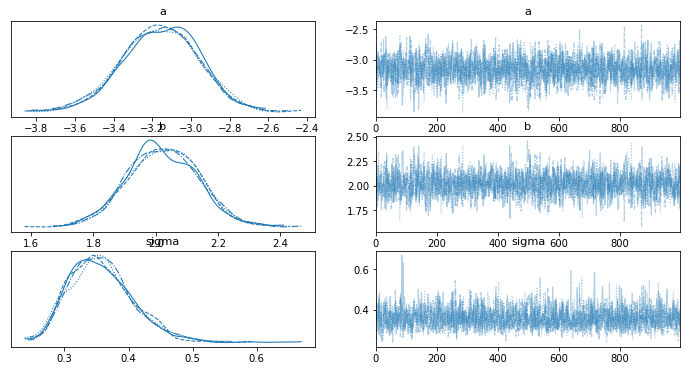

In [ ]:
az.plot_trace(inference_data, lines=[('sigma', sigma_ref), ('a', a_ref), ('b', b_ref)]);

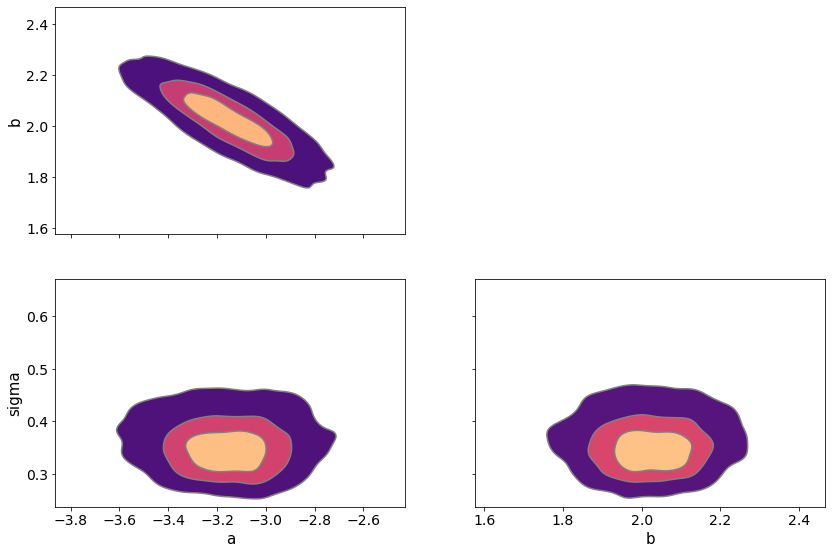

In [ ]:
az.plot_pair(inference_data,
             kind="kde",
             kde_kwargs={
                "hdi_probs": [0.3, 0.6, 0.9],  # Plot 30%, 60% and 90% HDI contours
                "contourf_kwargs": {"cmap": "magma"}
             });

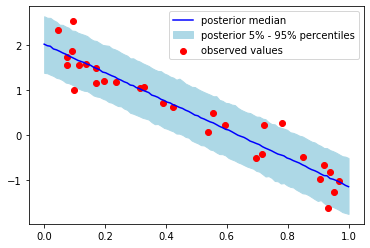

In [ ]:
#Extract the samples 
stacked = az.extract_dataset(inference_data)
a_samples = np.array(stacked.a)
b_samples = np.array(stacked.b)
sigma_samples = np.array(stacked.sigma)

#Make posterior predictive from samples
x = np.linspace(0, 1, 100)
posterior_predictive = np.random.normal(loc=a_samples[None,:]*x[:,None] + b_samples[None,:], scale=sigma_samples[None,:])

#Plot the results 
median = np.median(posterior_predictive, axis=1)
lower, upper = np.percentile(posterior_predictive, (5, 95), axis=1)
plt.plot(x, median, color='blue', label='posterior median');
plt.fill_between(x, lower, upper, color='lightblue', label='posterior 5% - 95% percentiles');
plt.scatter(x_observed, y_observed, color='red', label='observed values');
plt.legend();